In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df=pd.read_csv("train.csv")

In [ ]:
train_df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

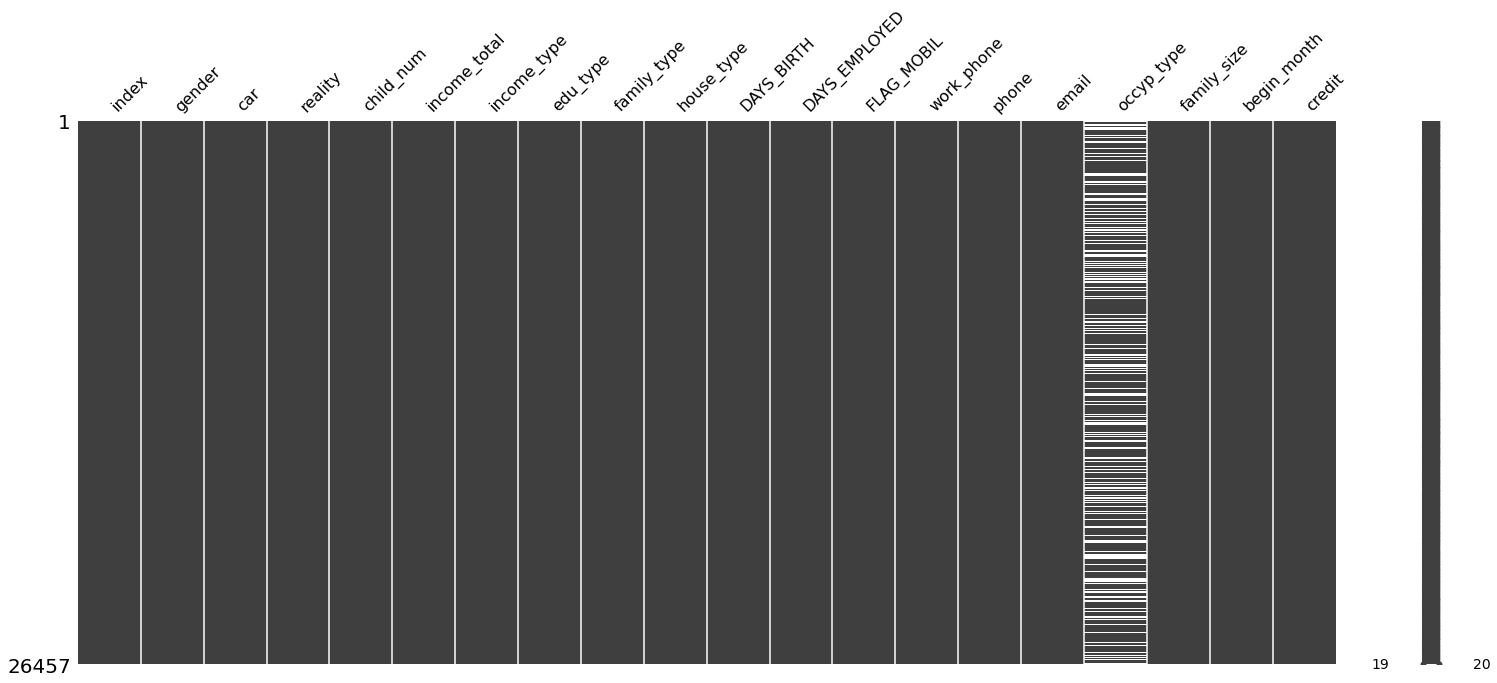

In [ ]:
msno.matrix(train_df)
plt.show()

In [ ]:
train_df.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

- index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득 (문제 제작 과정에서 변수들을 가공했기에 상대적인 지표로 판단)
- income_type: 소득 분류
							['Commercial associate(상업사원)', 'Working', 'State servant(국정원)', 'Pensioner(연금수령자)', 'Student']

- edu_type: 교육 수준
							['Higher education(고등교육)' ,'Secondary / secondary special(중등교육)', 'Incomplete higher(불완전 고등교육)', 'Lower secondary(초등학교 고등학교 사이)', 'Academic degree(대학에서 고등교육 과정 마침)']

- family_type: 결혼 여부
							['Married', 'Civil marriage', 'Separated(별거)', 'Single / not married', 'Widow(과부)']

- house_type: 생활 방식
							['Municipal apartment(시립아파트)', 'House / apartment', 'With parents','Co-op apartment(법인인 주거용 주택 옵션)', 'Rented apartment(임대용 아파트)', 'Office apartment(사무실 콘도미니엄)']

- DAYS_BIRTH: 출생일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

							양수 값은 고용되지 않은 상태를 의미함

- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형													
- family_size: 가족 규모
- begin_month: 신용카드 발급 월
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함
                            (실제 신용카드 연체 일수, 횟수 등에 따라 부여된 등급)

## value_counts()로 개수 알아보기

In [ ]:
train_df.value_counts("DAYS_EMPLOYED",sort=True)

DAYS_EMPLOYED
 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-5756         1
-1608         1
-1602         1
-1593         1
-15713        1
Length: 3470, dtype: int64

In [ ]:
train_df.value_counts("credit",sort=True)

credit
2.0    16968
1.0     6267
0.0     3222
dtype: int64

In [ ]:
train_categorical=train_df[["gender","car","reality","income_type","edu_type","family_type","house_type","FLAG_MOBIL","work_phone","phone","email","occyp_type","credit"]]
train_numeric=train_df[["child_num","income_total","DAYS_BIRTH","DAYS_EMPLOYED","family_size","begin_month"]]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


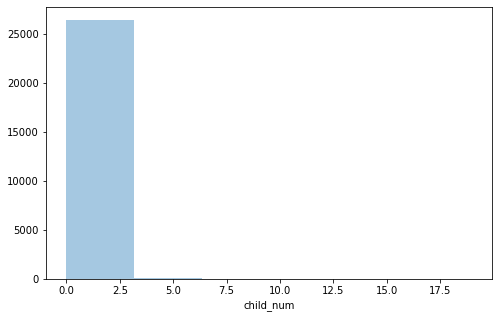

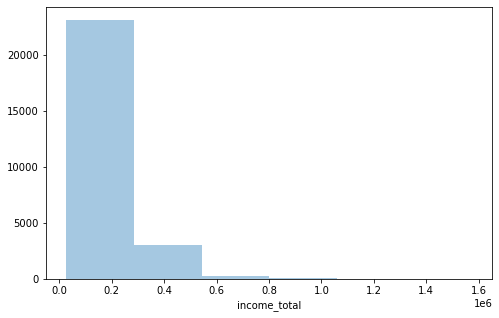

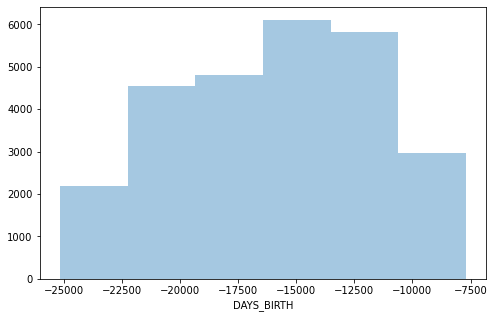

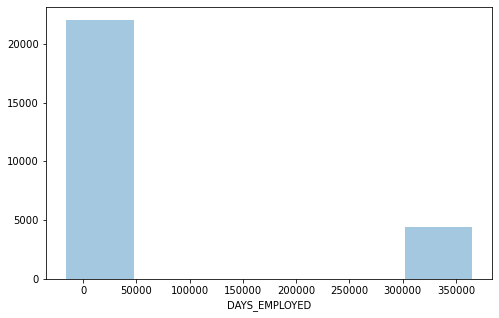

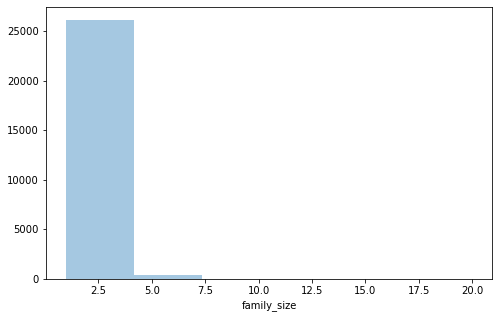

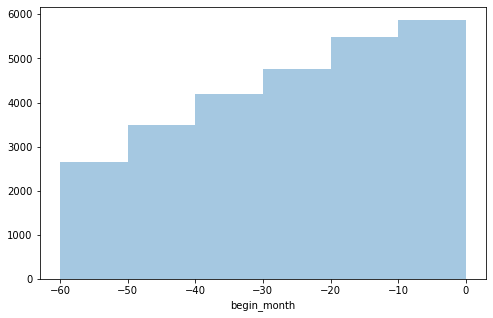

In [ ]:
for column in train_numeric.columns[0:]:
    plt.figure(figsize=(8, 5))
    plt.ticklabel_format(style='plain', axis='y')
    sns.distplot(train_numeric[column], kde=False, bins=6)

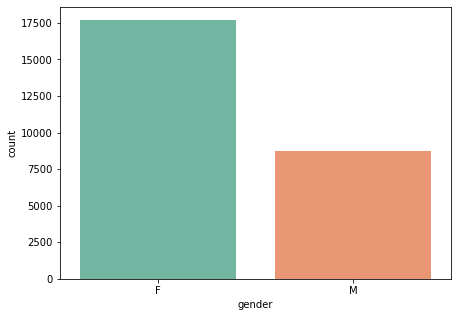

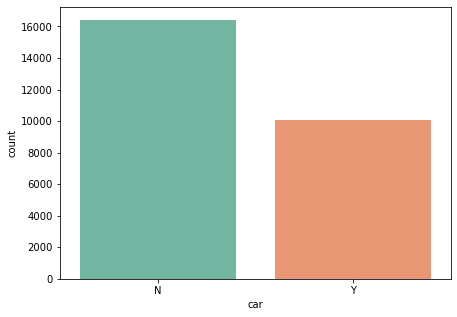

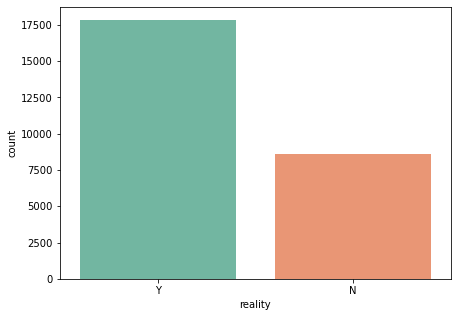

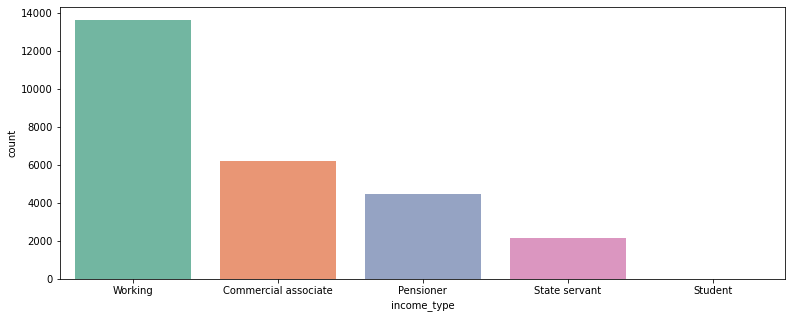

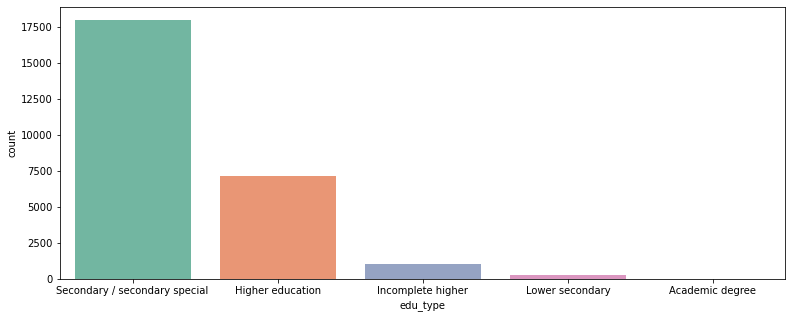

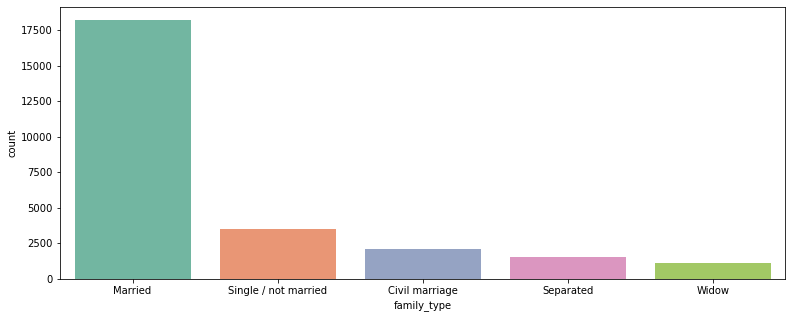

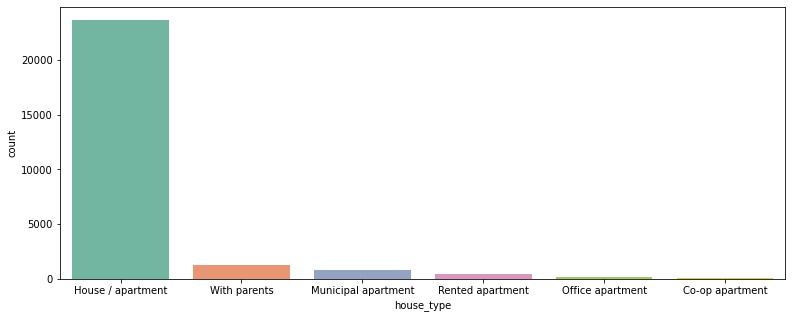

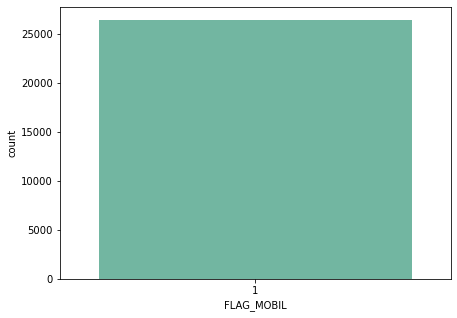

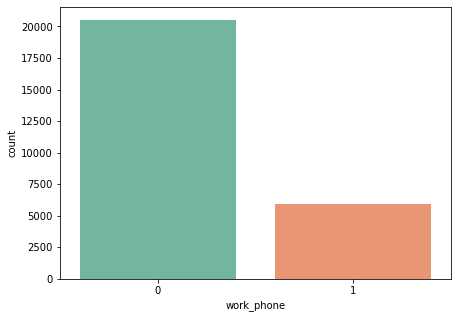

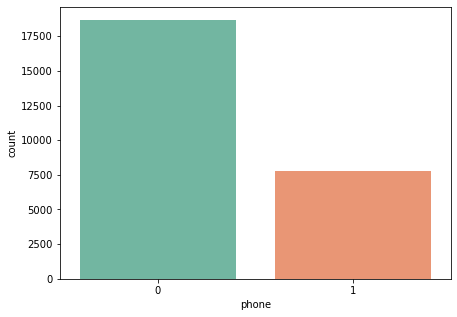

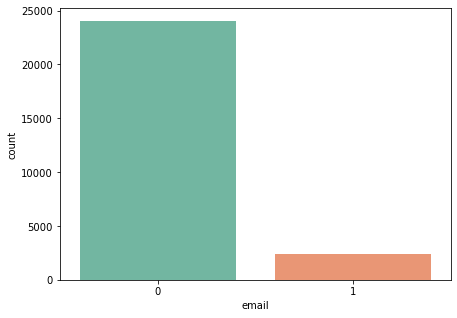

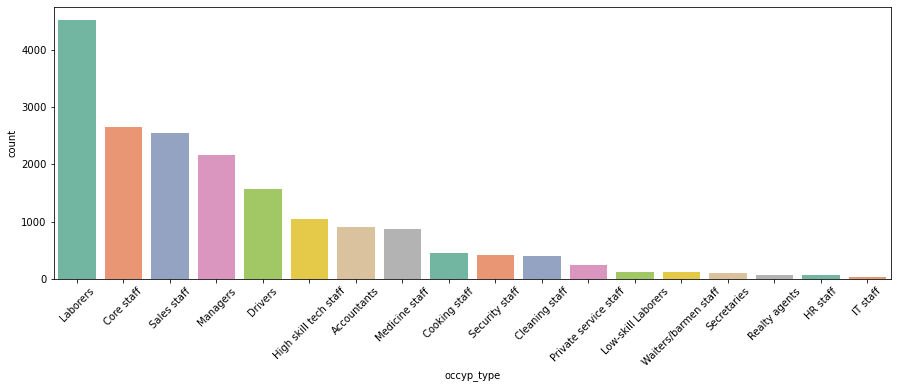

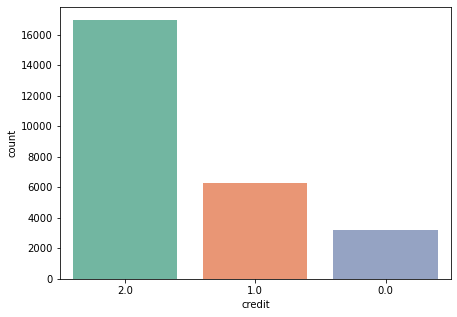

In [ ]:
for column in train_categorical.columns[0:]:
    if (len(train_categorical[column].value_counts())>=10):
        plt.figure(figsize=(15,5))
        sns.countplot(x=column, data = train_categorical, order = train_categorical[column].value_counts().index, palette="Set2")
        plt.xticks(rotation=45)

    elif (len(train_categorical[column].value_counts())>=5):
        plt.figure(figsize=(13,5))
        sns.countplot(x=column, data = train_categorical, order = train_categorical[column].value_counts().index, palette="Set2")    
    else:
        plt.figure(figsize=(7,5))
        sns.countplot(x=column, data = train_categorical, order = train_categorical[column].value_counts().index, palette="Set2")

In [ ]:
train_df.value_counts("car",sort=True)

car
N    16410
Y    10047
dtype: int64

In [ ]:
train_df.value_counts("family_size",sort=True)

family_size
2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
dtype: int64

In [ ]:
train_df.value_counts("income_type",sort=True)

income_type
Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
dtype: int64

In [ ]:
train_df.value_counts("occyp_type",sort=True)

occyp_type
Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
dtype: int64

### occyp_type
    - Laborers                 4512 (노동자)
    - Core staff               2646 (핵심 직원)
    - Sales staff              2539 (영업 직원)
    - Managers                 2167 (관리자)
    - Drivers                  1575 (운전기사)
    - High skill tech staff    1040 (고급 기술 직원)
    - Accountants               902 (회계사)
    - Medicine staff            864 (의료진)
    - Cooking staff             457 (조리원)
    - Security staff            424 (보안 요원)
    - Cleaning staff            403 (청소 직원)
    - Private service staff     243 (개인 서비스 직원)
    - Low-skill Laborers        127 (저숙련 노동자)
    - Waiters/barmen staff      124 (웨이터/바텐더 직원)
    - Secretaries                97 (비서)
    - Realty agents              63 (부동산 중개인)
    - HR staff                   62 (인사담당자)
    - IT staff                   41 (IT 직원)


In [ ]:
pd.pivot_table(train_df,index=train_df["credit"])

,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,begin_month,child_num,email,family_size,income_total,index,phone,work_phone
credit,,,,,,,,,,,
0.0,-15870.497827,58595.379268,1,-23.987896,0.418063,0.083489,2.194289,190807.582402,13316.986034,0.303228,0.226257
1.0,-15734.349130,61103.375140,1,-21.078826,0.430509,0.086644,2.177118,181122.701532,13314.038455,0.280357,0.227062
2.0,-16057.303277,58407.164899,1,-28.391914,0.429986,0.094472,2.204620,188925.666991,13179.325083,0.297678,0.223597


In [ ]:
train_categorical.groupby(["gender","credit"]).count()

car  reality  income_type  edu_type  family_type  house_type  \
gender credit                                                                   
F      0.0      2148     2148         2148      2148         2148        2148   
       1.0      4220     4220         4220      4220         4220        4220   
       2.0     11329    11329        11329     11329        11329       11329   
M      0.0      1074     1074         1074      1074         1074        1074   
       1.0      2047     2047         2047      2047         2047        2047   
       2.0      5639     5639         5639      5639         5639        5639   

               FLAG_MOBIL  work_phone  phone  email  occyp_type  
gender credit                                                    
F      0.0           2148        2148   2148   2148        1388  
       1.0           4220        4220   4220   4220        2741  
       2.0          11329       11329  11329  11329        7219  
M      0.0           1074        1074   1074   1074         867  
       1.0           2047        2047   2047   2047        1588  
       2.0           5639        5639   5639   5639        4483

In [ ]:
def bar_chart(feature, ax=None): # feature <- 열 이름, ax <- subplot 객체 
    credit_0 = train_categorical[train_categorical["credit"]==0][feature].value_counts()
    credit_1 = train_categorical[train_categorical["credit"]==1][feature].value_counts()
    credit_2 = train_categorical[train_categorical["credit"]==2][feature].value_counts()
    
    credit_df = pd.DataFrame([credit_0, credit_1,credit_2])
    credit_df.index = ['0', '1',"2"]
    
    credit_df.plot(kind='bar', stacked=True, ax=ax)

[Text(0.5, 1.0, 'house_type')]

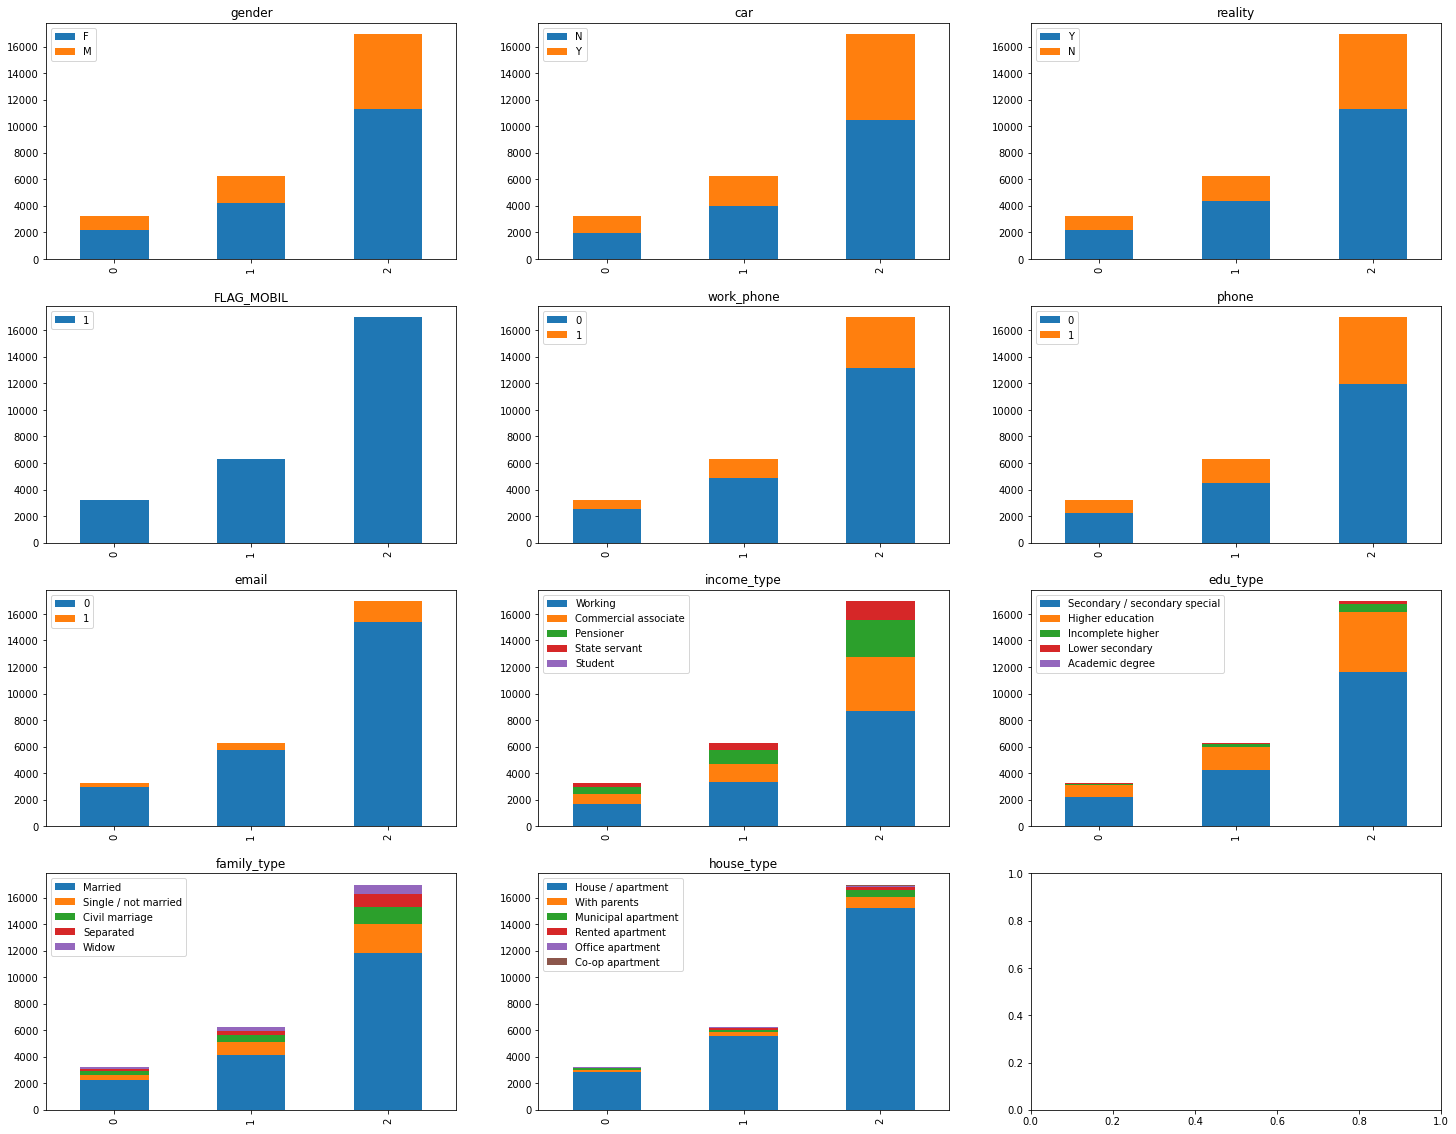

In [ ]:
#"gender","car","reality","income_type","edu_type","family_type","house_type","FLAG_MOBIL","work_phone","phone","email","occyp_type","credit"
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(nrows=4, ncols=3)
figure.set_size_inches(25,20)

bar_chart('gender', ax1)
bar_chart('car', ax2)
bar_chart('reality', ax3)
bar_chart('FLAG_MOBIL', ax4)
bar_chart('work_phone', ax5)
bar_chart('phone', ax6)
bar_chart('email', ax7)
bar_chart('income_type', ax8)
bar_chart('edu_type', ax9)
bar_chart('family_type', ax10)
bar_chart('house_type', ax11)


ax1.set(title="gender")
ax2.set(title="car")
ax3.set(title="reality")
ax4.set(title="FLAG_MOBIL")
ax5.set(title="work_phone")
ax6.set(title="phone")
ax7.set(title="email")

ax8.set(title="income_type")
ax9.set(title="edu_type")
ax10.set(title="family_type")
ax11.set(title="house_type")

<AxesSubplot:>

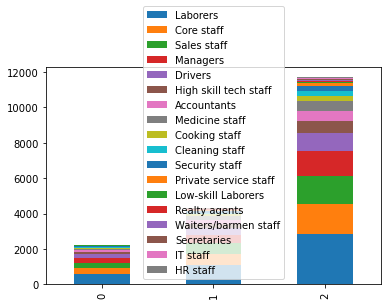

In [ ]:
credit_0 = train_categorical[train_categorical["credit"]==0]["occyp_type"].value_counts()
credit_1 = train_categorical[train_categorical["credit"]==1]["occyp_type"].value_counts()
credit_2 = train_categorical[train_categorical["credit"]==2]["occyp_type"].value_counts()

credit_df = pd.DataFrame([credit_0, credit_1,credit_2])
credit_df.index = ['0', '1',"2"]

credit_df.plot(kind='bar', stacked=True)

In [ ]:
#"child_num","DAYS_BIRTH","DAYS_EMPLOYED","family_size","begin_month"
def draw_facetgrid(feature):
    facet = sns.FacetGrid(train_df, hue="credit", aspect=5) # Multi-plot grid for plotting conditional relationships.
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(train_df[feature].min(), train_df[feature].max()))
    
    facet.add_legend() 
    plt.show()

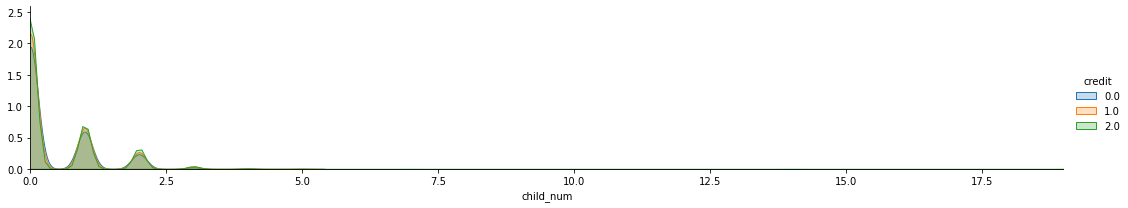

In [ ]:
draw_facetgrid("child_num")

<AxesSubplot:>

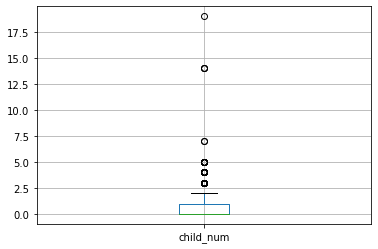

In [ ]:
train_df.boxplot(column="child_num")

In [ ]:
train_df["child_num"].mean()

0.42865782212646936

In [ ]:
train_df["child_num"].min()

0

In [ ]:
train_df[train_df["child_num"]>=4]["credit"].value_counts()

2.0    35
1.0    18
0.0    10
Name: credit, dtype: int64

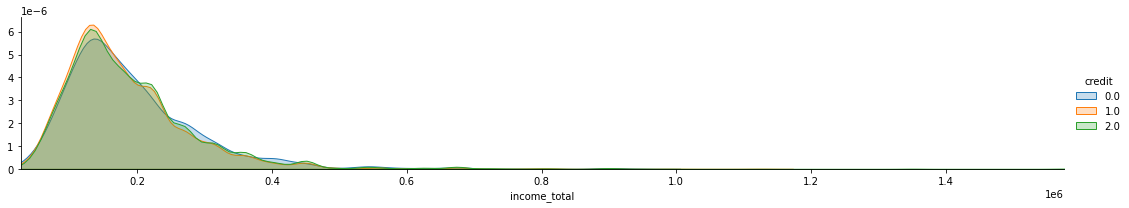

In [ ]:
draw_facetgrid("income_total")

<AxesSubplot:>

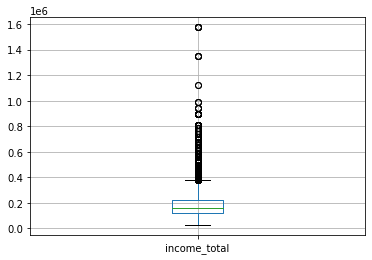

In [ ]:
train_df.boxplot(column="income_total")

In [ ]:
train_df[train_df["income_total"]>=train_df["income_total"].mean()]["credit"].value_counts()

2.0    6649
1.0    2257
0.0    1269
Name: credit, dtype: int64

In [ ]:
train_df['income_total'].value_counts(bins=10,sort=False)

(25451.999, 181800.0]     16212
(181800.0, 336600.0]       8330
(336600.0, 491400.0]       1530
(491400.0, 646200.0]        206
(646200.0, 801000.0]        121
(801000.0, 955800.0]         44
(955800.0, 1110600.0]         3
(1110600.0, 1265400.0]        2
(1265400.0, 1420200.0]        4
(1420200.0, 1575000.0]        5
Name: income_total, dtype: int64

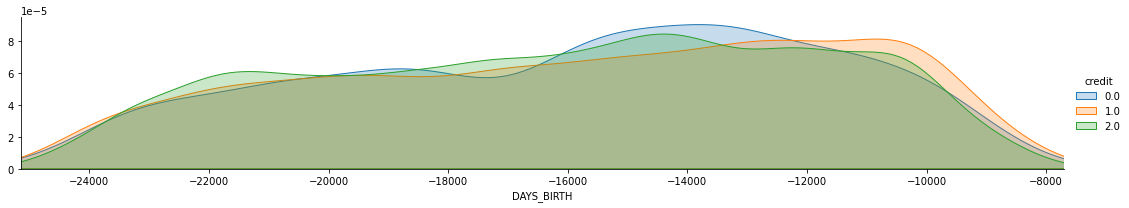

In [ ]:
draw_facetgrid("DAYS_BIRTH")

In [ ]:
train_df["age"]=abs(train_df["DAYS_BIRTH"])/365

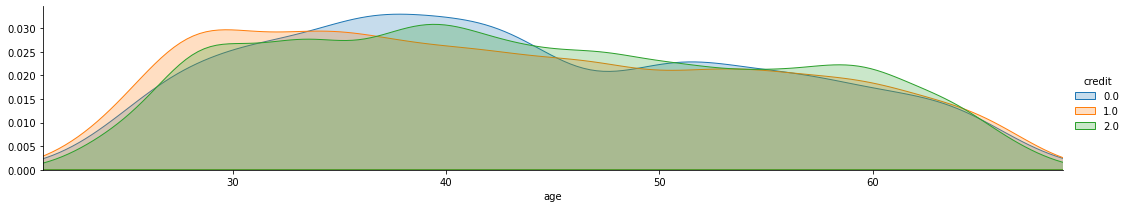

In [ ]:
draw_facetgrid("age")

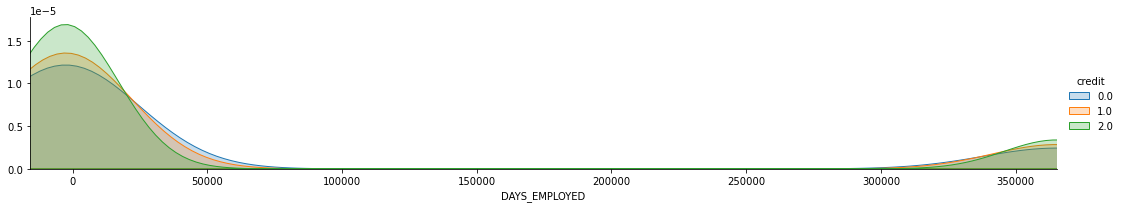

In [ ]:
draw_facetgrid("DAYS_EMPLOYED")

In [ ]:
train_df[train_df['DAYS_EMPLOYED']>=0]["DAYS_EMPLOYED"].value_counts()

365243    4438
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
train_df[train_df['DAYS_EMPLOYED']<0]["DAYS_EMPLOYED"].value_counts(sort=True)

-401      57
-1539     47
-200      45
-2087     44
-309      41
          ..
-1640      1
-5862      1
-3847      1
-5910      1
-12278     1
Name: DAYS_EMPLOYED, Length: 3469, dtype: int64

<AxesSubplot:ylabel='Frequency'>

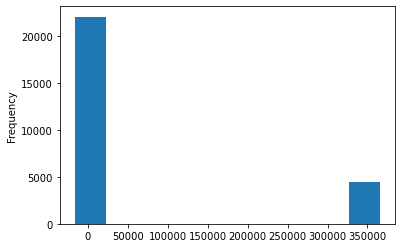

In [ ]:
train_df['DAYS_EMPLOYED'].plot(kind='hist')

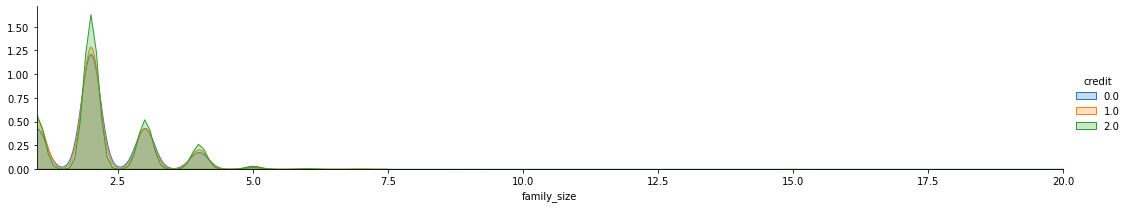

In [ ]:
draw_facetgrid("family_size")

<AxesSubplot:>

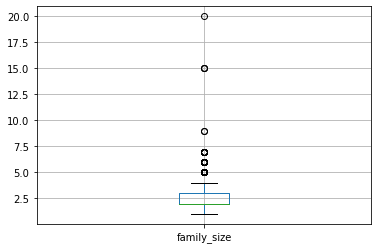

In [ ]:
train_df.boxplot(column="family_size")

In [ ]:
train_df["family_size"].min()

1.0

In [ ]:
train_df[train_df["family_size"]>=5]["credit"].value_counts()

2.0    222
1.0     92
0.0     36
Name: credit, dtype: int64

In [ ]:
train_df[train_df["family_size"]>=7]["credit"].value_counts()

2.0    7
1.0    6
0.0    2
Name: credit, dtype: int64

In [ ]:
family_size=pd.cut(train_df['family_size'], 5, labels=list(range(5)))

In [ ]:
family_size.value_counts()

0    26107
1      344
3        3
2        2
4        1
Name: family_size, dtype: int64

In [ ]:
#family_size=pd.qcut(train_df['family_size'], 5, labels=list(range(5)))

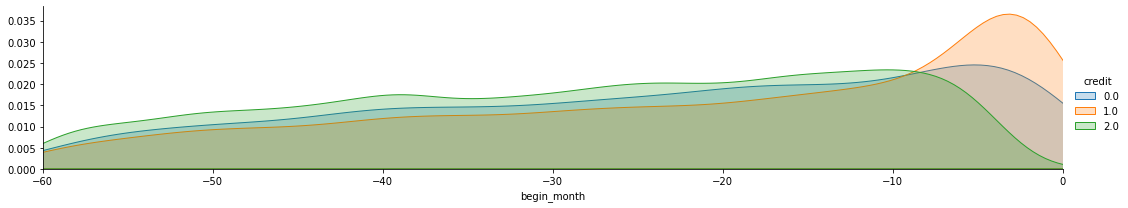

In [ ]:
draw_facetgrid("begin_month")

In [ ]:
train_df["begin_month1"]=abs(train_df["begin_month"])

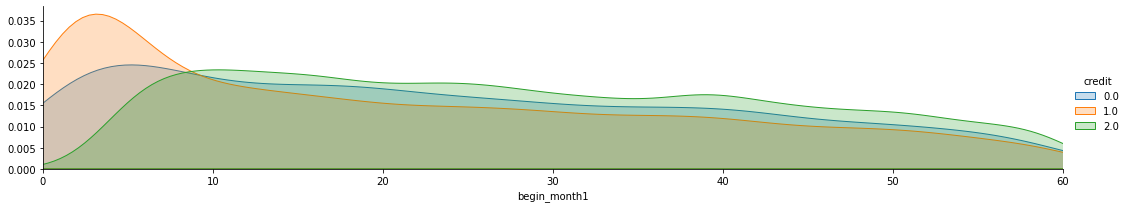

In [ ]:
draw_facetgrid("begin_month1")

<AxesSubplot:>

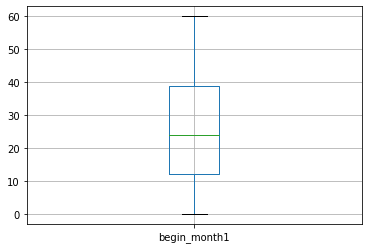

In [ ]:
train_df.boxplot(column="begin_month1")